Welcome to the Neuroscience MRI visualization Application 

Tiffany Kashima

Arizona State University

School of Complex Adaptive Science

In [2]:
""" The application enviornment started with a wide base installation of libraries and packages useful for neuroscience data.
The purpose is to allow agile exploration of these tools in the notebook, making comparisons and ultimately a decision to keep or use
each one.  The final enviornment file will reflect only the libraries and packages that are actually used in the final codebase.  """

import imageio as iio
import scipy.ndimage as ndi
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import ipywidgets as widgets

In [3]:
#import data from OpenNEURO

brain_slice = iio.imread('/Users/tiffanykashima/NeuroAppProject/data/DICOM/IM-0004-0094.dcm', 'DICOM')

type(brain_slice)

/var/folders/28/dx9tylyj2fn_cpf5hmzmgtwr0000gn/T/ipykernel_115/1340084949.py:3: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  brain_slice = iio.imread('/Users/tiffanykashima/NeuroAppProject/data/DICOM/IM-0004-0094.dcm', 'DICOM')


imageio.core.util.Array

In [4]:
#display meta data from dicom file
brain_slice.meta

Dict([('TransferSyntaxUID', '1.2.840.10008.1.2.1'),
      ('SOPClassUID', '1.2.840.10008.5.1.4.1.1.4'),
      ('SOPInstanceUID',
       '1.2.840.113619.2.176.3596.7771172.7255.1265293350.475'),
      ('StudyDate', '20100204'),
      ('SeriesDate', '20100204'),
      ('AcquisitionDate', '20100204'),
      ('ContentDate', '20100204'),
      ('StudyTime', '201859'),
      ('SeriesTime', '202511'),
      ('AcquisitionTime', '202511'),
      ('ContentTime', '202511'),
      ('Modality', 'MR'),
      ('Manufacturer', 'GE MEDICAL SYSTEMS'),
      ('InstitutionName', 'IWK Health Centre'),
      ('SeriesDescription', 'SAG 3D T1 SPGR'),
      ('PatientName', 'AARONTEST'),
      ('PatientID', 'AARONTEST'),
      ('PatientBirthDate', ''),
      ('PatientSex', 'M '),
      ('PatientAge', '000Y'),
      ('PatientWeight', 70.307),
      ('SliceSpacing', 1.0),
      ('StudyInstanceUID',
       '1.2.840.113619.2.176.3596.7771172.7628.1265291937.899'),
      ('SeriesInstanceUID',
       '1.2.840.113619.

In [7]:
#size of array of image file
brain_slice.shape

(256, 256)

In [8]:
#one slice from image file, 1mm slice
brain_slice.meta['sampling']

(1.0, 1.0)

In [9]:
# show array of one slice (first slice)
brain_slice[0]

Array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  6,  6,  2,  0,  1, 13,
       22, 20, 34, 16,  5, 20, 16,  3, 15, 17,  7,  2,  4, 21, 11, 19, 14,
       10, 29,  9,  4, 33, 40, 13, 18, 29,  7,  0,  8, 21, 15, 21, 13,  7,
       27, 75, 50,  3, 27, 15, 22, 42, 44, 20,  0, 37, 68, 33,  7, 48, 39,
        7, 29, 31, 21, 12, 48, 34, 29, 58, 88, 60, 46, 58, 50, 41, 53, 46,
       24, 33, 12, 26, 54, 31, 60, 61, 29, 18,  0,  3, 18, 21, 13,  8, 22,
       40, 29, 15, 15, 22, 13,  1, 10, 33, 60, 43,  9, 11, 35, 40, 24, 18,
        3,  5, 14, 12, 10, 21, 21,  7, 28, 32, 15, 10,  9, 22, 25, 10,  1,
        6, 13, 12, 17,  3,  3, 18, 15, 16, 13,  8, 14,  6, 12, 25, 20, 12,
        5,  9, 18, 19, 17

In [10]:
# first column
brain_slice[:,0]

Array([   0,    0,    0,    0,    0,    0,    1,    4,   34,   24,   42,
         61,    0,   75,   51,   39,   52,   13,    3,   34,   49,  100,
          3,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,   

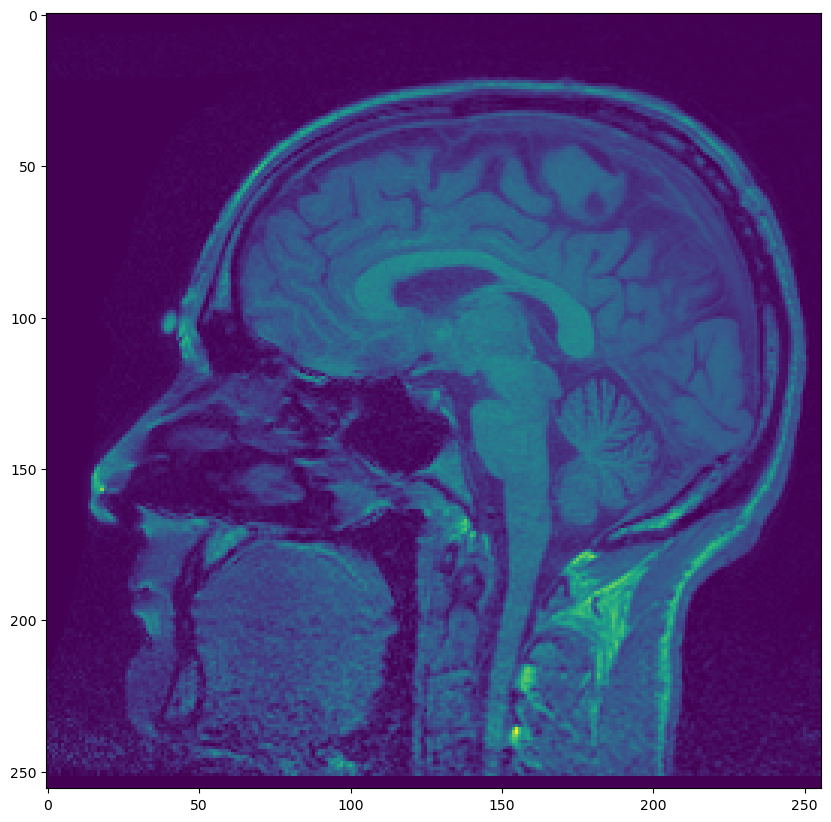

In [11]:
fig, ax = plt.subplots(1, 1, figsize=(10,20))
plt.imshow(brain_slice)

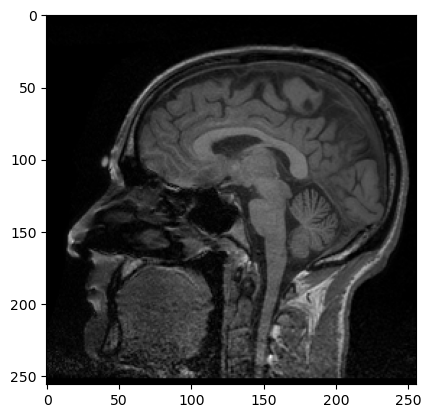

In [12]:
plt.imshow(brain_slice, cmap='gray')

In [13]:
brain_vol = iio.volread('/Users/tiffanykashima/NeuroAppProject/data/DICOM', 'DICOM')

Reading DICOM (examining files): 1/184 files (0.5173/184 files (94.0%184/184 files (100.0%)
  Found 1 correct series.
Reading DICOM (loading data): 184/184  (100.0%)


In [14]:
#184 1 mm slices, each slice in 256 x 256 
brain_vol.shape

(184, 256, 256)

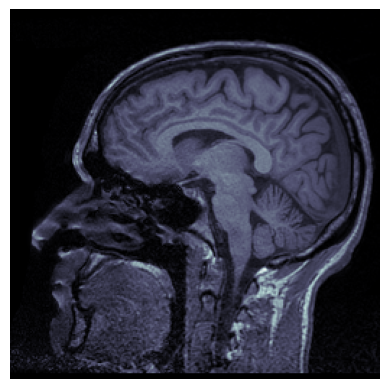

In [15]:
#volume is a 3D array, slices are the first dimension
plt.imshow(brain_vol[96], cmap='bone')
plt.axis('off')
plt.show()

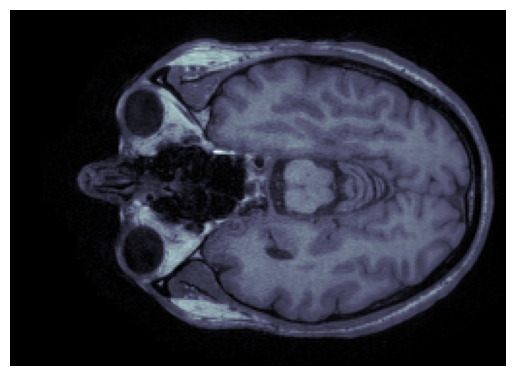

In [16]:
plt.imshow(brain_vol[:,128], cmap='bone')
plt.axis('off')
plt.show()

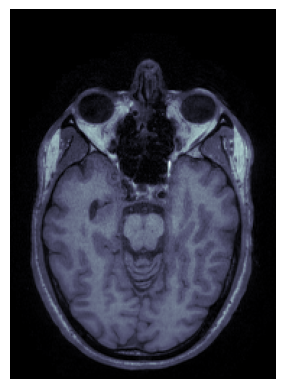

In [17]:
# rotate axial image 270 degrees
plt.imshow(ndi.rotate(brain_vol[:,128], 270), cmap='bone')
plt.axis('off')
plt.show()

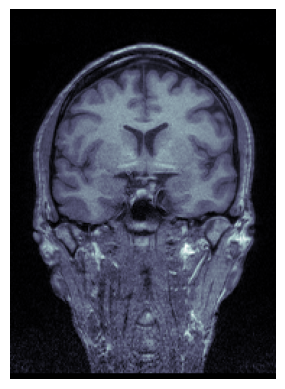

In [18]:
# coronal view, rotated 270 
plt.imshow(ndi.rotate(brain_vol[:,:,128], 270), cmap='bone')
plt.axis('off')
plt.show()

In [19]:
import app_functions as af
import data_loading_functions as df

In [ ]:
study = df.loadVolume()
s0, s1, s2 = af.numSlices(study)

@widgets.interact_manual(
    color=['jet', 'bone', 'cmap'], axial=(0,s0-1), coronal=(0,s1-1), transverse=(0,s2-1))
def imageViewer():
    fig, ax = plt.subplots(1,3,figsize=(8,8))
    a0, a1, a2 = af.getAspectRatio(study)

    ax[0].imshow(study[axial,:,:], cmap = color, aspect=a0)
    ax[0].axis('off')
    ax[0].set_title('Axial')

    ax[1].imshow(study[:,coronal,:], cmap = color, aspect=a1)
    ax[1].axis('off')
    ax[1].set_title('Coronal')

    ax[2].imshow(study[:,:,transverse], cmap = color, aspect=a2)
    ax[2].axis('off')
    ax[2].set_title('Transverse')